In [ ]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import LinearSVC,SVC
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import roc_curve,auc,roc_auc_score


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
z = zipfile.ZipFile("/content/drive/MyDrive/datasets/youtube+spam+collection.zip")
psy=pd.read_csv(z.open("Youtube01-Psy.csv"))
katy=pd.read_csv(z.open("Youtube02-KatyPerry.csv"))
LMFAO=pd.read_csv(z.open("Youtube03-LMFAO.csv"))
Eminem=pd.read_csv(z.open("Youtube04-Eminem.csv"))
Shakira=pd.read_csv(z.open("Youtube05-Shakira.csv"))
youtubeSpam =pd.read_csv('/content/drive/MyDrive/datasets/YoutubeSpamMergedData.csv')
ytcomments = pd.read_csv('/content/drive/MyDrive/datasets/5000 YT comments.csv', encoding='ISO-8859-1') #No need
youcomments=pd.read_csv('/content/drive/MyDrive/datasets/Youtube-Spam-Dataset.csv')

In [ ]:
psy

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1


In [ ]:
# List of datasets
datasets = [psy, katy, LMFAO, Eminem, Shakira, youtubeSpam, ytcomments, youcomments]

In [ ]:
# Standardize column names by stripping whitespace and converting to lowercase
for dataset in datasets:
    dataset.columns = dataset.columns.str.strip().str.lower()

# Define the columns we want to drop if they exist
cols_to_drop = ['time', 'comment_id', 'author', 'video_id', 'unnamed: 0',
                'unnamed: 1', 'video_name', 'date', 'likes', 'name', 'reply count']

# Drop only specified columns if they exist in each DataFrame
for dataset in datasets:
    dataset.drop(columns=[col for col in cols_to_drop if col in dataset.columns], inplace=True)

# Inspect each DataFrame to verify only the intended columns are left
for dataset, name in zip(datasets, ["psy", "katy", "LMFAO", "Eminem", "Shakira", "youtubeSpam", "ytcomments", "youcomments"]):
    print(f"Columns in {name} after dropping:", dataset.columns)

Columns in psy after dropping: Index(['content', 'class'], dtype='object')
Columns in katy after dropping: Index(['content', 'class'], dtype='object')
Columns in LMFAO after dropping: Index(['content', 'class'], dtype='object')
Columns in Eminem after dropping: Index(['content', 'class'], dtype='object')
Columns in Shakira after dropping: Index(['content', 'class'], dtype='object')
Columns in youtubeSpam after dropping: Index(['content', 'class'], dtype='object')
Columns in ytcomments after dropping: Index(['comment', 'spam'], dtype='object')
Columns in youcomments after dropping: Index(['content', 'class'], dtype='object')


In [ ]:
# Rename columns for all datasets
for dataset in datasets:
    dataset.columns = ['CONTENT', 'CLASS']

In [ ]:
# # Standardize column names by stripping whitespace and converting to lowercase

# psy.columns = psy.columns.str.strip().str.lower()
# katy.columns = katy.columns.str.strip().str.lower()
# LMFAO.columns = LMFAO.columns.str.strip().str.lower()
# Eminem.columns = Eminem.columns.str.strip().str.lower()
# Shakira.columns = Shakira.columns.str.strip().str.lower()
# youtubeSpam.columns = youtubeSpam.columns.str.strip().str.lower()
# ytcomments.columns = ytcomments.columns.str.strip().str.lower()
# youcomments.columns = youcomments.columns.str.strip().str.lower()

# # Define the columns we want to drop if they exist
# cols_to_drop = ['time', 'comment_id', 'author', 'video_id', 'unnamed: 0','unnamed: 1', 'video_name', 'date','likes','name','reply count']

# # Drop only specified columns if they exist in each DataFrame
# if set(cols_to_drop).intersection(youtubeSpam.columns):
#     youtubeSpam.drop(columns=[col for col in cols_to_drop if col in youtubeSpam.columns], inplace=True)
# if set(cols_to_drop).intersection(ytcomments.columns):
#     ytcomments.drop(columns=[col for col in cols_to_drop if col in ytcomments.columns], inplace=True)
# if set(cols_to_drop).intersection(youcomments.columns):
#     youcomments.drop(columns=[col for col in cols_to_drop if col in youcomments.columns], inplace=True)
# if set(cols_to_drop).intersection(psy.columns):
#     psy.drop(columns=[col for col in cols_to_drop if col in psy.columns], inplace=True)
# if set(cols_to_drop).intersection(katy.columns):
#     katy.drop(columns=[col for col in cols_to_drop if col in katy.columns], inplace=True)
# if set(cols_to_drop).intersection(LMFAO.columns):
#     LMFAO.drop(columns=[col for col in cols_to_drop if col in LMFAO.columns], inplace=True)
# if set(cols_to_drop).intersection(Eminem.columns):
#     Eminem.drop(columns=[col for col in cols_to_drop if col in Eminem.columns], inplace=True)
# if set(cols_to_drop).intersection(Shakira.columns):
#     Shakira.drop(columns=[col for col in cols_to_drop if col in Shakira.columns], inplace=True)

# # Now inspect each DataFrame to verify only the intended columns are left
# print("Columns in psy after dropping:", psy.columns)
# print("Columns in katy after dropping:", katy.columns)
# print("Columns in LMFAO after dropping:", LMFAO.columns)
# print("Columns in Eminem after dropping:", Eminem.columns)
# print("Columns in Shakira after dropping:", Shakira.columns)
# print("Columns in youtubeSpam after dropping:", youtubeSpam.columns)
# print("Columns in ytcomments after dropping:", ytcomments.columns)
# print("Columns in youcomments after dropping:", youcomments.columns)


In [ ]:
# Concatenate all the datasets
df = pd.concat([psy, katy, LMFAO, Eminem, Shakira,youtubeSpam, youcomments], ignore_index=True)

In [ ]:
# Remove duplicates and handle missing values
# df.drop_duplicates(inplace=True)
# df.dropna(subset=['CONTENT', 'CLASS'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5868 entries, 0 to 5867
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  5868 non-null   object
 1   CLASS    5868 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 91.8+ KB


In [ ]:
df.describe()

,CLASS
count,5868.000000
mean,0.515167
std,0.499812
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
df.head(6)

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
5,"Hey, check out my new website!! This site is a...",1


In [ ]:
a=df['CONTENT'].str.contains("Thank you")

In [ ]:
df.shape()

TypeError: 'tuple' object is not callable

In [ ]:
df['CLASS'].value_counts()

,count
CLASS,
1,3023
0,2845


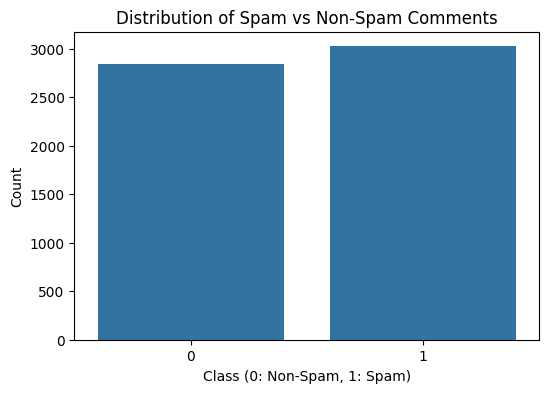

In [ ]:
# Distribution of spam vs non-spam comments
plt.figure(figsize=(6,4))
sns.countplot(x='CLASS', data=df)
plt.title('Distribution of Spam vs Non-Spam Comments')
plt.xlabel('Class (0: Non-Spam, 1: Spam)')
plt.ylabel('Count')
plt.show()

<ipython-input-17-02c09fdf9db5>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['Content_length'], hue=df['CLASS'], shade=True, bw_adjust=.5)


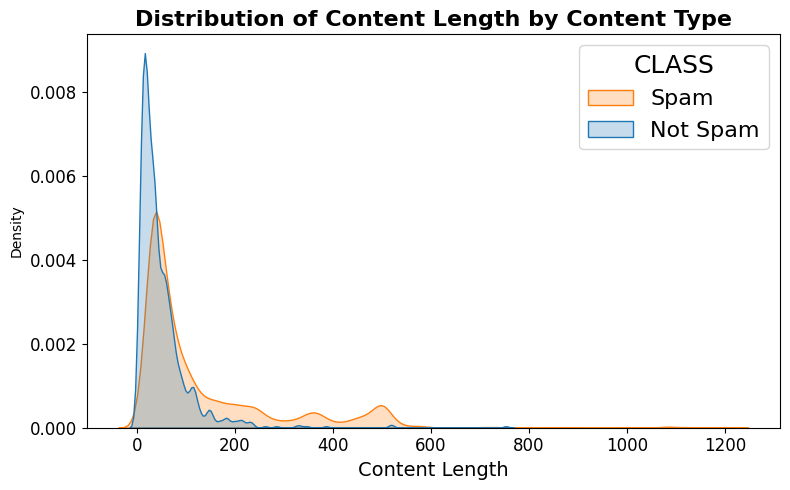

In [ ]:
df = df.copy()
df['Content_length'] = df['CONTENT'].str.len()
plt.figure(figsize=(8, 5))
sns.kdeplot(x=df['Content_length'], hue=df['CLASS'], shade=True, bw_adjust=.5)
plt.xlabel('Content Length', fontsize=14)
plt.title('Distribution of Content Length by Content Type', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='CLASS',labels=["Spam", "Not Spam"] ,fontsize=16, title_fontsize=18)
plt.tight_layout()
plt.show()

# Spliting

In [ ]:
stop_words=['music','youtube','video','i','u', 'me','love','Thank','Thank you','Thank u',' Thank ','song','video','br','music' ,'my',"thank you", "please", "thanks", 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"'so', 'keep', 'when', "'m", 'do', 'either', 'them', 'whence', 'with', 'put', '‘ve', 'on', 'your', 'becoming', 'whereby', 'whose', 'each', 'amount', 'me', 'fifteen', 'mostly', 'show', 'would', 'next',  'there', 'nothing', 'she', 'but', 'for', 'here', 'why', 'these', 'further', 'between', 'eleven', 'than', 'am', 'beside', 'after', 'under', 'if','around', 'have', 'such', 'less', 'her', 'before', 'although', 'has', 'among', 'amongst', 'least', '’re', 'should', 'fifty', 'last', 'off', 'formerly', 'until', 'much', 'this', '’ll', 'get', 'perhaps', 'how', 'eight', 'any', 'indeed', 'you', 'myself', 'neither', 'seeming', 'beforehand', 'it', 'thru', 'out', 'call', 'forty', 'one', 'still', 'whereupon', 'wherever', 'over', 'also', 'former', 'namely', 'been', 'make', 'doing', 'regarding', 'he', 'due', 'other', 'bottom', 'sometimes', 'a', 'moreover', 'though', 'whether', 'seemed', 'too', "'re", 'could', 'part', 'everything', 'by', 'thus', 'anyway', 'into', 'go', 'nevertheless', 'anyhow', 'within', 'whoever', 'third', 'being', 'various', 'wherein', 'at', 'take', 'thereby', 'does', 'nine','what', 'almost', 'ever', 'my', 'name', 'yours', 'hereby', 'say', 'hereupon', 'and', 'twelve', 'becomes', 'about', 'own', '’m', 'beyond', 'just', 'above', 'full', 'very', 'besides', 'had', 'noone', 'anything', 'both', 'down', 'whenever', 'several', 'afterwards', 'are',  'because', 'might', 'upon', 'quite', 'done', 'to', 'top', 'really', 'were', 'across', 'yourself', 'others', 'only', 'anywhere', 'move', 'whatever', 'their', 'therein', 'everyone', 'everywhere', 'now', 'something', 'toward', 'however', 'see', 'alone', "'s", '’ve', 'its', 'back', 'our', 'itself', '’d', 'every', 'thereafter', 'whom', 'already', 'as', 'hers', 'where','behind', 'in', 'therefore', 'used', 'together', 'hereafter', 'ca', 'mine', 'many', 'else', 'onto', 'since', '’s', 'whither', 'somewhere', 'themselves', 'from', 'otherwise', 'sixty', 'twenty', 'is', 'two', 'towards', '‘s', 'ten', 'they', 'please', 'those', 'did',  'hundred', 'again', 'became', 'made', 'who', '‘re', 'herein', 'same', 'front', 'up', 'whereas', 'along', 'three', 'then', 'which', 'rather', 'via', 'empty', 'hence', 'seems', 'seem', 'was', 'well', 'meanwhile', 'someone', 'elsewhere', 'once', '‘d', 'the', 'latterly', 'using', 'sometime', 'some', 'whereafter', 'six', 'while', 'of', "'d", 'first', 'herself', 'us', 'be', 'we', 'become', 'often', 'i', 'all', 'another', 'side', 'five', '‘m',  'four', 'must', 'him','somehow', 'serious', "'ll", 'or', 'none', 'during', 'can', 'thence', 'through', 're', 'that', '‘ll', 'his', "'ve", 'throughout', 'always', 'may', 'give', 'will', 'whole', 'yourselves', 'latter', 'ourselves', 'nowhere', 'thereupon', 'an', 'per', 'ours','day','much']

In [ ]:
stop_words=list(set(stop_words))

In [ ]:
X=df['CONTENT']
y=df['CLASS']

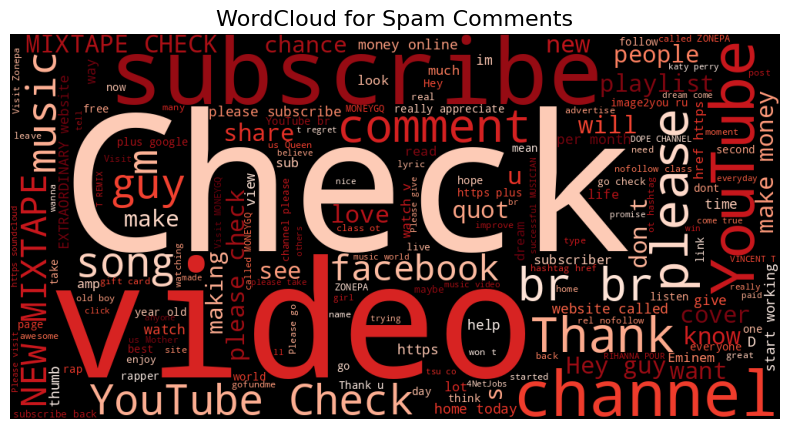

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500, min_font_size = 10, background_color = 'black',colormap='Reds')
spam_wordcloud = wordcloud.generate(df[df['CLASS'] == 1]['CONTENT'].str.cat(sep = " "))
plt.figure(figsize = (8,6))
plt.imshow(spam_wordcloud)
plt.title('WordCloud for Spam Comments', fontsize=16)


plt.axis('off')
plt.tight_layout()

plt.show()


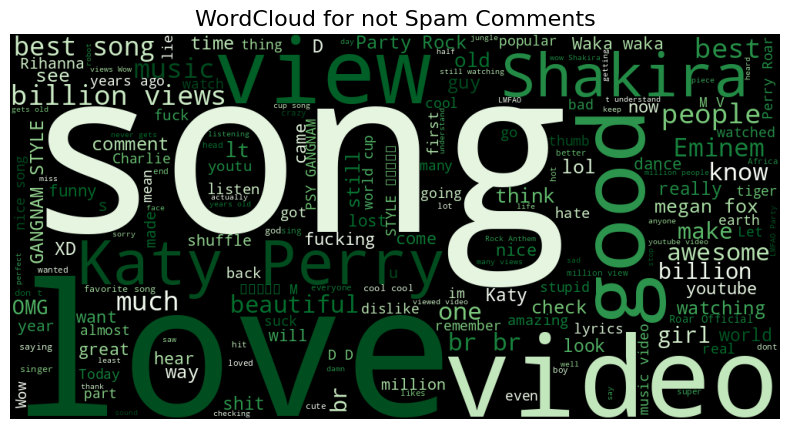

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500, min_font_size = 10, background_color = 'black',colormap='Greens')
spam_wordcloud = wordcloud.generate(df[df['CLASS'] == 0]['CONTENT'].str.cat(sep = " "))
plt.figure(figsize = (8,6))
plt.imshow(spam_wordcloud)
plt.title('WordCloud for not Spam Comments', fontsize=16)

plt.axis('off')
plt.tight_layout()

plt.show()

In [ ]:
tfidf_vect=TfidfVectorizer(use_idf=True,lowercase=True,stop_words=stop_words)
X=tfidf_vect.fit_transform(df['CONTENT'])
y=df['CLASS']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['thank', 'tso'] not in stop_words.
  warnings.warn(


# Logistic Regression

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
model_LR= LogisticRegression(C=0.5, random_state=42)
model_LR.fit(X_train, y_train)

LogisticRegression(C=0.5, random_state=42)

In [ ]:
y_pred = model_LR.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


In [ ]:
from sklearn.model_selection import cross_val_score

# Use 5-fold cross-validation
scores = cross_val_score(model_LR, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.97103918 0.96337308 0.96848382 0.96248934 0.97016198]
Mean accuracy: 0.9671094806339691


In [ ]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       842
           1       0.99      0.94      0.96       919

    accuracy                           0.96      1761
   macro avg       0.96      0.96      0.96      1761
weighted avg       0.96      0.96      0.96      1761



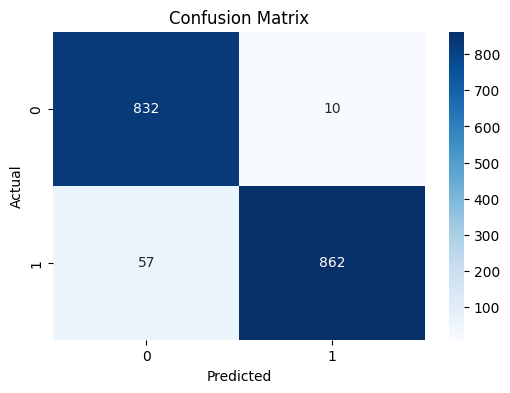

In [ ]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
dump(model_LR, 'logistic_reg_model.pkl')


dump(tfidf_vect, 'tfidf_vectorizer.pkl')

print("Model saved as 'logistic_reg_model.pkl'")

Model saved as 'logistic_reg_model.pkl'


# SVC

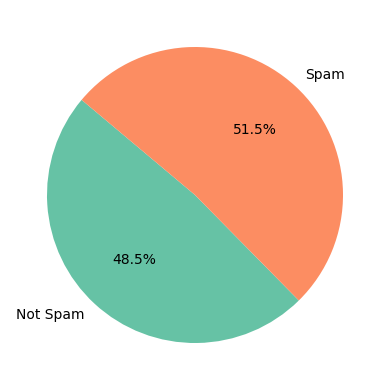

In [ ]:
#pie chart of spam vs real comments
spam_counts = df['CLASS'].value_counts().sort_index()

palette = sns.color_palette("Set2", n_colors=len(spam_counts))
fig = plt.figure(figsize=(6,4))
plt.pie(spam_counts, autopct='%1.1f%%', startangle=140, colors=palette, labels=["Not Spam", "Spam"])
plt.tight_layout()
plt.show()

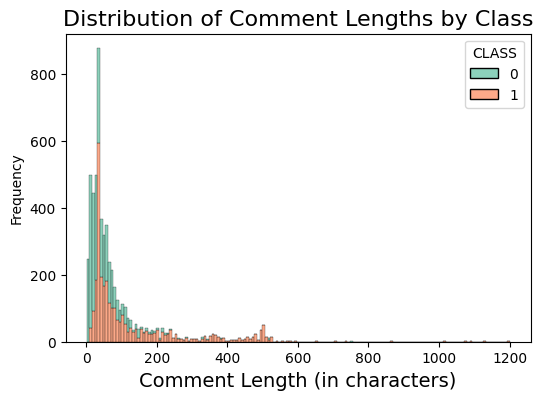

In [ ]:
#create field for comment length
df['Comment Length'] = df['CONTENT'].apply(len)

#create plot for comment length feature
plt.figure(figsize=(6, 4))
sns.histplot(df, x='Comment Length', hue='CLASS', multiple='stack', palette='Set2')
plt.title('Distribution of Comment Lengths by Class', fontsize=16)
plt.xlabel('Comment Length (in characters)', fontsize=14)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
# Instantiate the SVC model (using default 'rbf' kernel)
model_SVC = SVC(class_weight='balanced', random_state=42)

# Train the model
model_SVC.fit(X_train, y_train)


SVC(class_weight='balanced', random_state=42)

In [ ]:
y_pred = model_SVC.predict(X_test)
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       854
           1       0.99      0.98      0.99       907

    accuracy                           0.99      1761
   macro avg       0.99      0.99      0.99      1761
weighted avg       0.99      0.99      0.99      1761



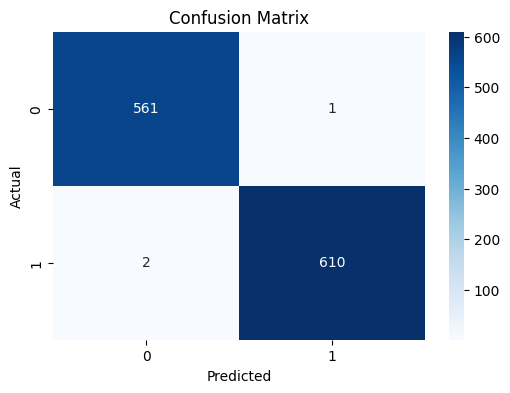

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
dump(model_SVC, 'SVC_model.pkl')


dump(tfidf_vect, 'tfidf_vectorizer.pkl')

print("Model saved as 'SVC.pkl'")

Model saved as 'SVC.pkl'


# Random Forest


In [ ]:
model_RFC = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Train the model
model_RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
# Make predictions
y_pred = model_RFC.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87       842
           1       0.98      0.73      0.84       919

    accuracy                           0.85      1761
   macro avg       0.88      0.86      0.85      1761
weighted avg       0.88      0.85      0.85      1761



In [ ]:
from sklearn.model_selection import cross_val_score

# Use 5-fold cross-validation
scores = cross_val_score(model_RFC, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.92504259 0.95059625 0.93696763 0.90366581 0.94458653]
Mean accuracy: 0.9321717636021152


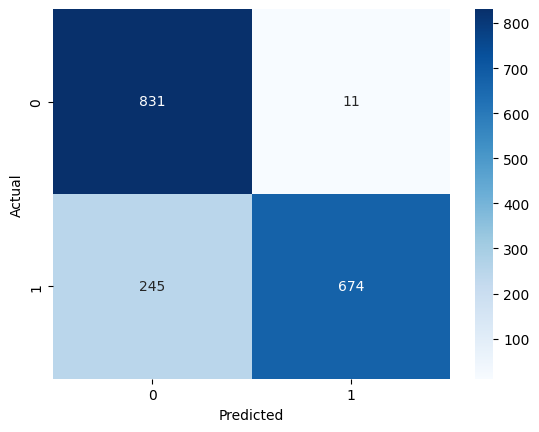

In [ ]:
# Get predictions
y_pred = model_RFC.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
dump(model_RFC, 'RFC_model.pkl')


dump(tfidf_vect, 'tfidf_vectorizer.pkl')

print("Model saved as 'RFC_model.pkl'")

Model saved as 'RFC_model.pkl'


# XGBOOST

In [ ]:
model_XG = XGBClassifier()

# Train the model
model_XG.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [ ]:
y_pred = model_XG.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       842
           1       0.99      0.97      0.98       919

    accuracy                           0.98      1761
   macro avg       0.98      0.98      0.98      1761
weighted avg       0.98      0.98      0.98      1761



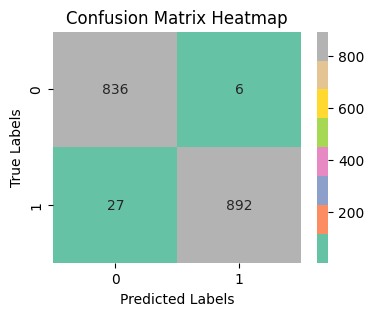

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Set2')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
dump(model_XG, 'XG_model.pkl')


dump(tfidf_vect, 'tfidf_vectorizer.pkl')

print("Model saved as 'XG_model.pkl'")

Model saved as 'XG_model.pkl'


# Navie Bayes

In [ ]:
model_NB = MultinomialNB()

# Train the model
model_NB.fit(X_train, y_train)

MultinomialNB()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       842
           1       0.93      0.96      0.94       919

    accuracy                           0.94      1761
   macro avg       0.94      0.94      0.94      1761
weighted avg       0.94      0.94      0.94      1761



In [ ]:
y_pred = model_NB.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       842
           1       0.93      0.96      0.94       919

    accuracy                           0.94      1761
   macro avg       0.94      0.94      0.94      1761
weighted avg       0.94      0.94      0.94      1761



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


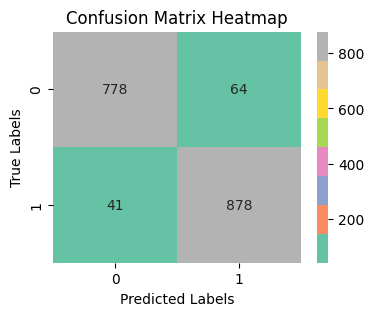

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Set2')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
model_NB.score(X_test,y_test)

0.9403747870528109

In [ ]:
dump(model_NB, 'NB_model.pkl')


dump(tfidf_vect, 'tfidf_vectorizer.pkl')

print("Model saved as 'NB_model.pkl'")

Model saved as 'NB_model.pkl'


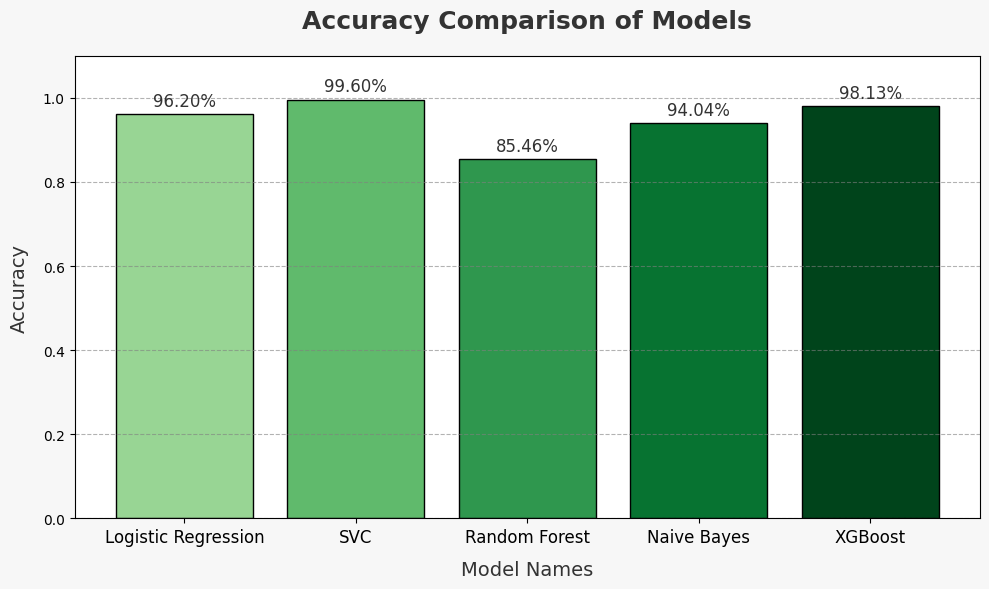

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# List of trained models
models = {
    'Logistic Regression': model_LR,
    'SVC': model_SVC,
    'Random Forest': model_RFC,
    'Naive Bayes': model_NB,
    'XGBoost': model_XG
}

# Compute actual accuracies
names = list(models.keys())
acc = [accuracy_score(y_test, model.predict(X_test)) for model in models.values()]

# Create colors for the bars
colors = plt.cm.Greens(np.linspace(0.4, 1, len(acc)))

# Plot the bar chart
plt.figure(figsize=(10, 6), facecolor='#f7f7f7')

bars = plt.bar(names, acc, color=colors, edgecolor='black')

# Add titles and labels
plt.title('Accuracy Comparison of Models', fontsize=18, fontweight='bold', pad=20, color='#333333')
plt.xlabel('Model Names', fontsize=14, labelpad=10, color='#333333')
plt.ylabel('Accuracy', fontsize=14, labelpad=10, color='#333333')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')

# Annotate the bars with accuracy percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval*100:.2f}%', ha='center', va='bottom', fontsize=12, color='#333333')

# Set the y-axis limit for better visibility
plt.ylim(0, 1.1)

# Customize x-axis ticks
plt.xticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


     Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Model 1  0.961953   0.963359  0.961953  0.961971  0.994111
1  Model 2  0.996025   0.996026  0.996025  0.996025       N/A
2  Model 3  0.854628   0.882750  0.854628  0.852892  0.982894
3  Model 4  0.981261   0.981554  0.981261  0.981268  0.995426
4  Model 5  0.940375   0.940608  0.940375  0.940330   0.99213


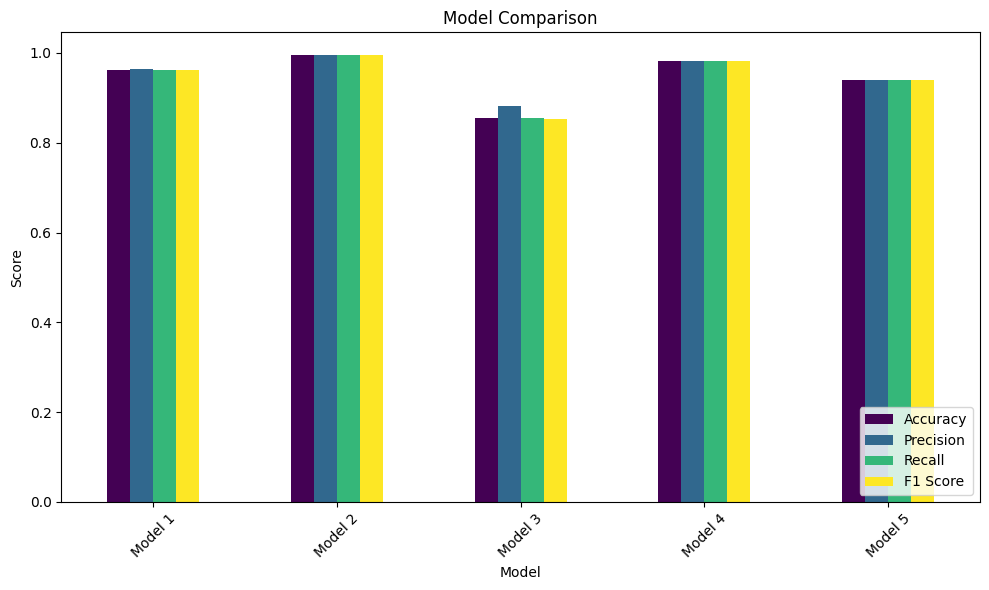

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

# List of models
models = {
    'Model 1': model_LR,
    'Model 2': model_SVC,
    'Model 3': model_RFC,
    'Model 4': model_XG,
    'Model 5': model_NB
}

# Initialize a dictionary to store the results
results = []

# Iterate over each model
for model_name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # If the model has probability predictions, calculate ROC-AUC (optional)
    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    except AttributeError:
        roc_auc = 'N/A'

    # Append results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the comparison table
print(results_df)

# Visualize comparison
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


# Testing


In [ ]:
model = load('RFC_model.pkl')
print("Model loaded successfully")

# Load the TF-IDF vectorizer from the file
loaded_tfidf_vect = load('tfidf_vectorizer.pkl')
print("TF-IDF Vectorizer loaded successfully")

Model loaded successfully
TF-IDF Vectorizer loaded successfully


In [ ]:
# Example test data
new_comments = [
    "This is an amazing video!",
    "Click here to get a free iPhone!",
    "Subscribe to my channel for more offers!",
    "claim prizes by clicking this link for free",
    "Good Morning","best Wishes","thanks",
    "Amazing website to grab more money"
    # Add more examples as needed
]


In [ ]:
# Transform the new data using the loaded TF-IDF vectorizer
new_comments_tfidf = tfidf_vect.transform(new_comments)


In [ ]:
# Predict whether each comment is spam or not
predictions = model.predict(new_comments_tfidf)

# Display results
for comment, prediction in zip(new_comments, predictions):
    label = "Spam" if prediction == 1 else "Not Spam"
    print(f"Comment: {comment}\nPrediction: {label}\n")


Comment: This is an amazing video!
Prediction: Not Spam

Comment: Click here to get a free iPhone!
Prediction: Spam

Comment: Subscribe to my channel for more offers!
Prediction: Spam

Comment: claim prizes by clicking this link for free
Prediction: Spam

Comment: Good Morning
Prediction: Not Spam

Comment: best Wishes
Prediction: Not Spam

Comment: thanks
Prediction: Not Spam

Comment: Amazing website to grab more money
Prediction: Spam

